# Colloborative filtering workflow

In [1]:
import numpy as np
import pandas as pd
import random
from collections import defaultdict

from surprise import Dataset
from surprise import Reader
from surprise import BaselineOnly, Dataset, Reader, SVD, KNNBasic, KNNBaseline, KNNWithMeans, dump

from surprise.model_selection import GridSearchCV
from surprise.model_selection import train_test_split

from model.CollaborativeFilteringRec import cf_model

from evaluation.Evaluate import Evaluate

## Data preprocessing

In [2]:
# preprocess and save data for collaborative filtering modelling
from data_script.preprocess_collaborative import hamid_user_id, sveta_user_id, anti_hamid_user_id, anti_sveta_user_id

Creating dataframes...
Filtering users...
Out of total of  138493  users,  64051  are considered lazy and will be removed.
The final number of users is  74442
Randomly choosing 400 users...
Adding Sviatlana's and Hamid's ratings... we are lazy users, but still...
Sveta 's user id is 47347
Hamid 's user id is 23579
Adding anti-Sviatlana's and anti-Hamid's ratings... they are lazy users, but still...
anti-Sveta 's user id is 14433
anti-Hamid 's user id is 96258
Now, the final number of users is  404
Filtering movies...
Out of total of  7899  movies,  5855  are considered rare and will be removed.
The final number of movies is  2044
Creating the pivot matrix...
The resulting sparcity of the matrix is: 0.9085211970316406
Preparing the final rating matrix...
Data preprocesssing for collaborative filtering modeling is completed!


In [3]:
hamid_user_id, sveta_user_id, anti_hamid_user_id, anti_sveta_user_id = (hamid_user_id, sveta_user_id, anti_hamid_user_id, anti_sveta_user_id)

In [4]:
#Get the final ratings matrix
print("Getting the ratings matrix...")
ratings = pd.read_csv('./data/processed/final_ratings.csv')
movie_df = pd.read_csv('./data/external/movies.csv')

Getting the ratings matrix...


In [5]:
#Prepare data in the Surprise's format
print("Preparing data in the Suprise format...")
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings[["userId", "movieId", "rating"]], reader)

#Prepare train and test data (what about validation?)
#trainset, testset = train_test_split(data, test_size=.25, random_state=42)

# For final preditions
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()

Preparing data in the Suprise format...


## Pre-clustering users

## KNN Basic

In [13]:
#KNN-based memory based model
sim_options = {'name': 'msd',
               'min_support': 3,
               'user_based': True}

knn_basic = KNNBasic(k=25,sim_options=sim_options)

In [14]:
knn_basic_model = cf_model(knn_basic, trainset, testset, data, 20)
knn_basic_model.fit_and_predict()

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5227


0.523

In [15]:
knn_basic_model.cross_validate()

Cross Validating the data...
Mean CV RMSE is 0.886


0.886

In [16]:
dump.dump('model/trained_models/KNNBasic_Model',algo=knn_basic_model,predictions=knn_basic_model.pred_test)

In [17]:
knn_basic_model.recommend_all(sveta_user_id).merge(movie_df, on='movieId', how='left').head(20)

,userId,movieId,pred_rating,title,genres
0,47347,3030,4.643503,Yojimbo (1961),Action|Adventure
1,47347,1260,4.605416,M (1931),Crime|Film-Noir|Thriller
2,47347,2028,4.560241,Saving Private Ryan (1998),Action|Drama|War
3,47347,3089,4.558230,Bicycle Thieves (a.k.a. The Bicycle Thief) (a....,Drama
4,47347,912,4.548456,Casablanca (1942),Drama|Romance
5,47347,745,4.535521,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy
6,47347,110,4.529197,Braveheart (1995),Action|Drama|War
7,47347,750,4.526569,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
8,47347,1252,4.516153,Chinatown (1974),Crime|Film-Noir|Mystery|Thriller
9,47347,1225,4.507412,Amadeus (1984),Drama


In [52]:
knn_basic_model.recommend_all(anti_sveta_user_id).merge(movie_df, on='movieId', how='left').head(20)

,userId,movieId,pred_rating,title,genres
0,14433,3030,4.651951,Yojimbo (1961),Action|Adventure
1,14433,1260,4.622471,M (1931),Crime|Film-Noir|Thriller
2,14433,3089,4.582985,Bicycle Thieves (a.k.a. The Bicycle Thief) (a....,Drama
3,14433,3307,4.537921,City Lights (1931),Comedy|Drama|Romance
4,14433,904,4.480727,Rear Window (1954),Mystery|Thriller
5,14433,3629,4.461928,"Gold Rush, The (1925)",Adventure|Comedy|Romance
6,14433,908,4.459043,North by Northwest (1959),Action|Adventure|Mystery|Romance|Thriller
7,14433,922,4.446178,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance
8,14433,1212,4.441824,"Third Man, The (1949)",Film-Noir|Mystery|Thriller
9,14433,1218,4.427738,"Killer, The (Die xue shuang xiong) (1989)",Action|Crime|Drama|Thriller


## KNN Pearson

In [19]:
#KNN-based memory based model
sim_options = {'name': 'pearson',
               'min_support': 3,
               'user_based': True}

knn_pearson = KNNBasic(k=25,sim_options=sim_options)

In [20]:
knn_pearson_model = cf_model(knn_pearson, trainset, testset, data, 20)
knn_pearson_model.fit_and_predict()

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.5808


0.581

In [21]:
knn_pearson_model.cross_validate()

Cross Validating the data...
Mean CV RMSE is 0.912


0.912

In [22]:
dump.dump('model/trained_models/KNNPearson_Model',algo=knn_pearson_model,predictions=knn_pearson_model.pred_test)

In [23]:
knn_pearson_model.recommend_all(sveta_user_id).merge(movie_df, on='movieId', how='left').head(20)

,userId,movieId,pred_rating,title,genres
0,47347,125,4.821921,Flirting With Disaster (1996),Comedy
1,47347,1264,4.721006,Diva (1981),Action|Drama|Mystery|Romance|Thriller
2,47347,932,4.659013,"Affair to Remember, An (1957)",Drama|Romance
3,47347,2303,4.610191,Nashville (1975),Drama|Musical
4,47347,81834,4.584908,Harry Potter and the Deathly Hallows: Part 1 (...,Action|Adventure|Fantasy|IMAX
5,47347,1148,4.582854,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime
6,47347,1280,4.548846,Raise the Red Lantern (Da hong deng long gao g...,Drama
7,47347,262,4.540247,"Little Princess, A (1995)",Children|Drama
8,47347,1234,4.526385,"Sting, The (1973)",Comedy|Crime
9,47347,3030,4.519924,Yojimbo (1961),Action|Adventure


## KNN With Means

In [24]:
sim_options = {'name': 'cosine',
               'min_support': 5,
               'user_based': True}

knn_with_means = KNNWithMeans(k=24,sim_options=sim_options)

In [25]:
knn_with_means_model = cf_model(knn_with_means, trainset, testset, data, 20)
knn_with_means_model.fit_and_predict()

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.5882


0.588

In [26]:
knn_with_means_model.cross_validate()

Cross Validating the data...
Mean CV RMSE is 0.865


0.865

In [27]:
dump.dump('model/trained_models/KNNWithMeans_Model',algo=knn_with_means_model,predictions=knn_with_means_model.pred_test)

In [28]:
knn_with_means_model.recommend_all(sveta_user_id).merge(movie_df, on='movieId', how='left').head(20)

,userId,movieId,pred_rating,title,genres
0,47347,1260,5.000000,M (1931),Crime|Film-Noir|Thriller
1,47347,3030,5.000000,Yojimbo (1961),Action|Adventure
2,47347,1219,4.989073,Psycho (1960),Crime|Horror
3,47347,750,4.976906,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
4,47347,1148,4.965692,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime
5,47347,1218,4.951567,"Killer, The (Die xue shuang xiong) (1989)",Action|Crime|Drama|Thriller
6,47347,7156,4.925159,Fog of War: Eleven Lessons from the Life of Ro...,Documentary|War
7,47347,162,4.911114,Crumb (1994),Documentary
8,47347,1734,4.911033,My Life in Pink (Ma vie en rose) (1997),Comedy|Drama
9,47347,3089,4.903689,Bicycle Thieves (a.k.a. The Bicycle Thief) (a....,Drama


In [29]:
knn_with_means_model.recommend_all(hamid_user_id).merge(movie_df, on='movieId', how='left').head(20)

,userId,movieId,pred_rating,title,genres
0,23579,1260,4.555931,M (1931),Crime|Film-Noir|Thriller
1,23579,3030,4.518360,Yojimbo (1961),Action|Adventure
2,23579,1218,4.448711,"Killer, The (Die xue shuang xiong) (1989)",Action|Crime|Drama|Thriller
3,23579,7156,4.421844,Fog of War: Eleven Lessons from the Life of Ro...,Documentary|War
4,23579,1734,4.404420,My Life in Pink (Ma vie en rose) (1997),Comedy|Drama
5,23579,1212,4.394791,"Third Man, The (1949)",Film-Noir|Mystery|Thriller
6,23579,4642,4.384253,Hedwig and the Angry Inch (2000),Comedy|Drama|Musical
7,23579,3089,4.378405,Bicycle Thieves (a.k.a. The Bicycle Thief) (a....,Drama
8,23579,903,4.369080,Vertigo (1958),Drama|Mystery|Romance|Thriller
9,23579,162,4.367651,Crumb (1994),Documentary


## SVD default

In [30]:
# Retrain the model
svd = SVD()
svd_model = cf_model(svd, trainset, testset, data, 20)
svd_model.fit_and_predict()

RMSE: 0.5400


0.54

In [31]:
svd_model.cross_validate()

Cross Validating the data...
Mean CV RMSE is 0.856


0.856

In [32]:
dump.dump('model/trained_models/SVDDefault_Model',algo=svd_model,predictions=svd_model.pred_test)

In [53]:
svd_model.recommend_all(sveta_user_id).merge(movie_df, on='movieId', how='inner').head(20)

,userId,movieId,pred_rating,title,genres
0,47347,904,4.622796,Rear Window (1954),Mystery|Thriller
1,47347,1251,4.587854,8 1/2 (8½) (1963),Drama|Fantasy
2,47347,1212,4.526722,"Third Man, The (1949)",Film-Noir|Mystery|Thriller
3,47347,3307,4.525341,City Lights (1931),Comedy|Drama|Romance
4,47347,3435,4.506472,Double Indemnity (1944),Crime|Drama|Film-Noir
5,47347,1280,4.501883,Raise the Red Lantern (Da hong deng long gao g...,Drama
6,47347,515,4.498875,"Remains of the Day, The (1993)",Drama|Romance
7,47347,922,4.489372,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance
8,47347,1293,4.488867,Gandhi (1982),Drama
9,47347,48394,4.481020,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller


In [34]:
svd_model.recommend_all(hamid_user_id).merge(movie_df, on='movieId', how='inner').head(20)

,userId,movieId,pred_rating,title,genres
0,23579,1252,4.497889,Chinatown (1974),Crime|Film-Noir|Mystery|Thriller
1,23579,1207,4.355734,To Kill a Mockingbird (1962),Drama
2,23579,904,4.342237,Rear Window (1954),Mystery|Thriller
3,23579,162,4.338948,Crumb (1994),Documentary
4,23579,922,4.332010,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance
5,23579,1260,4.311628,M (1931),Crime|Film-Noir|Thriller
6,23579,29,4.279683,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
7,23579,3198,4.272830,Papillon (1973),Crime|Drama
8,23579,3503,4.268450,Solaris (Solyaris) (1972),Drama|Mystery|Sci-Fi
9,23579,2467,4.262612,"Name of the Rose, The (Name der Rose, Der) (1986)",Crime|Drama|Mystery|Thriller


## SVD tuned

In [35]:
param_grid = {
    'n_factors': [10, 50, 90],
    'n_epochs': [5, 20, 50], 
    'lr_all': [0.001, 0.005, 0.02],
    'reg_all': [0.005, 0.02, 0.1]}

gs = GridSearchCV(SVD, param_grid, measures=['mae'], cv=3, n_jobs = -1)
gs.fit(data)
params = gs.best_params['mae']
svdtuned = SVD(n_factors=params['n_factors'], n_epochs=params['n_epochs'],lr_all=params['lr_all'], reg_all=params['reg_all'])
svdtuned.fit(trainset)
svdtuned_predictions = svdtuned.test(testset)

In [36]:
dump.dump('model/trained_models/SVDTuned_Model',algo=svdtuned,predictions=svdtuned_predictions)

In [37]:
params

{'n_factors': 90, 'n_epochs': 50, 'lr_all': 0.02, 'reg_all': 0.1}

In [38]:
svd_tuned_model = cf_model(svdtuned, trainset, testset, data, 20)
svd_tuned_model.fit_and_predict()

RMSE: 0.5637


0.564

In [39]:
svd_tuned_model.cross_validate()

Cross Validating the data...
Mean CV RMSE is 0.83


0.83

In [55]:
svd_tuned_model.recommend_all(sveta_user_id).merge(movie_df, on='movieId', how='inner').head(20)

,userId,movieId,pred_rating,title,genres
0,47347,5971,4.739030,My Neighbor Totoro (Tonari no Totoro) (1988),Animation|Children|Drama|Fantasy
1,47347,904,4.704428,Rear Window (1954),Mystery|Thriller
2,47347,7156,4.662621,Fog of War: Eleven Lessons from the Life of Ro...,Documentary|War
3,47347,745,4.660284,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy
4,47347,1223,4.660019,"Grand Day Out with Wallace and Gromit, A (1989)",Adventure|Animation|Children|Comedy|Sci-Fi
5,47347,1147,4.650222,When We Were Kings (1996),Documentary
6,47347,5690,4.641063,Grave of the Fireflies (Hotaru no haka) (1988),Animation|Drama|War
7,47347,720,4.625189,Wallace & Gromit: The Best of Aardman Animatio...,Adventure|Animation|Comedy
8,47347,41,4.622624,Richard III (1995),Drama|War
9,47347,1263,4.587113,"Deer Hunter, The (1978)",Drama|War


In [56]:
svd_tuned_model.recommend_all(anti_sveta_user_id).merge(movie_df, on='movieId', how='inner').head(20)

,userId,movieId,pred_rating,title,genres
0,14433,926,5.000000,All About Eve (1950),Drama
1,14433,950,5.000000,"Thin Man, The (1934)",Comedy|Crime
2,14433,87232,5.000000,X-Men: First Class (2011),Action|Adventure|Sci-Fi|Thriller|War
3,14433,89745,5.000000,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX
4,14433,955,4.995493,Bringing Up Baby (1938),Comedy|Romance
5,14433,31410,4.982717,"Downfall (Untergang, Der) (2004)",Drama|War
6,14433,97938,4.967289,Life of Pi (2012),Adventure|Drama|IMAX
7,14433,70286,4.960785,District 9 (2009),Mystery|Sci-Fi|Thriller
8,14433,63082,4.950633,Slumdog Millionaire (2008),Crime|Drama|Romance
9,14433,59315,4.950124,Iron Man (2008),Action|Adventure|Sci-Fi


## Calculation of the quality of the collaborative filtering

 **Variety**

In [62]:
eval_knn_basic = Evaluate(knn_basic_model)
eval_knn_basic.Variety()

(0.07229000000000001, 0.0047038175985044325)

In [63]:
eval_knn_wmeans = Evaluate(knn_with_means_model)
eval_knn_wmeans.Variety()

(0.062430000000000006, 0.005812495161288308)

In [64]:
eval_svd = Evaluate(svd_model)
eval_svd.Variety()

(0.17796, 0.007712224063135095)

In [82]:
eval_tuned_svd = Evaluate(svd_tuned_model)
eval_tuned_svd.Variety()

(0.19802, 0.010099485135391805)

## Analysis of similarity matrices

In [ ]:
simMat_knn_basic = knn_basic_model.compute_similarities()
simMat_knn_with_means = knn_with_means_model.compute_similarities()
simMat_knn_pearson = knn_pearson_model.compute_similarities()

In [92]:
def sim_matrices_info(dict_of_matrices):
    df = pd.DataFrame(columns=['mean'], index=dict_of_matrices.keys())
    df['mean'] =  [x.mean() for x in dict_of_matrices.values()]
    return df

In [93]:
sim_matrices_info({'knn_basic': simMat_knn_basic, 'knn_with_means': simMat_knn_with_means, 'knn_pearson' :simMat_knn_pearson})

,mean
knn_basic,0.397944
knn_with_means,0.853196
knn_pearson,0.140685


<Axes: >

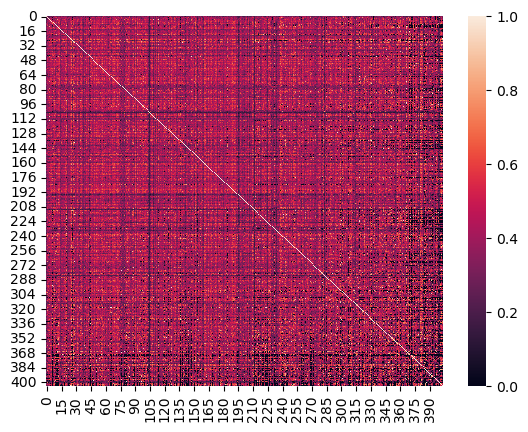

In [102]:
import seaborn as sns
sns.heatmap(simMat_knn_basic)

<Axes: >

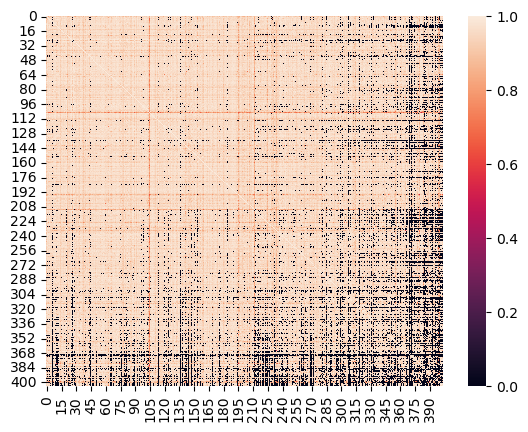

In [103]:
sns.heatmap(simMat_knn_with_means)

**Personalization**

In [65]:
def compute_prediction_overlap(userId_1, userId_2, model):
    overlap_array = []
    rec_1 = set(model.recommend_all(userId_1).movieId.values[:50])
    rec_2 = set(model.recommend_all(userId_2).movieId.values[:50])
    overlap = rec_1 
    return len(rec_1.intersection(rec_2))

def return_similarities(userId, model, simMat):
    df = pd.DataFrame(columns=["uuid", "similarity", "overlap"])
    uuid = model.trainset.to_inner_uid(userId)
    sim_array = simMat[uuid]
    uuid_array = np.arange(simMat.shape[0])
    df["uuid"] = uuid_array
    df["similarity"] = sim_array
    df["overlap"] = df.apply(lambda x: compute_prediction_overlap(userId, model.trainset.to_raw_uid(x["uuid"]), model), axis=1)
    return df.sort_values(by=["similarity"]).reset_index(drop=True)


In [44]:
hamid_user_id, sveta_user_id, anti_hamid_user_id, anti_sveta_user_id

(23579, 47347, 96258, 14433)

In [109]:
random_user = np.random.choice(ratings.userId.unique())  

In [110]:
#result_knn_with_means = return_similarities(random_user, knn_with_means_model, simMat_knn_with_means)
result_knn_basic = return_similarities(random_user, knn_basic_model, simMat_knn_basic )
#result_knn_pearson = return_similarities(random_user, knn_pearson_model, simMat_knn_pearson )

In [111]:
#result_svd_means = return_similarities(random_user, svd_model, simMat_knn_with_means )
result_svd_basic = return_similarities(random_user, svd_model, simMat_knn_basic )
#result_svd_tuned_means = return_similarities(random_user, svd_tuned_model, simMat_knn_with_means )
result_svd_tuned_basic = return_similarities(random_user, svd_tuned_model, simMat_knn_basic )
#result_svd_tuned_pearson = return_similarities(random_user, svd_tuned_model, simMat_knn_pearson )

In [48]:
result_anti_hamid_df = return_similarities(anti_hamid_user_id, svd_model, simMat_knn_with_means)
result_hamid_df = return_similarities(hamid_user_id, svd_model, simMat_knn_with_means)


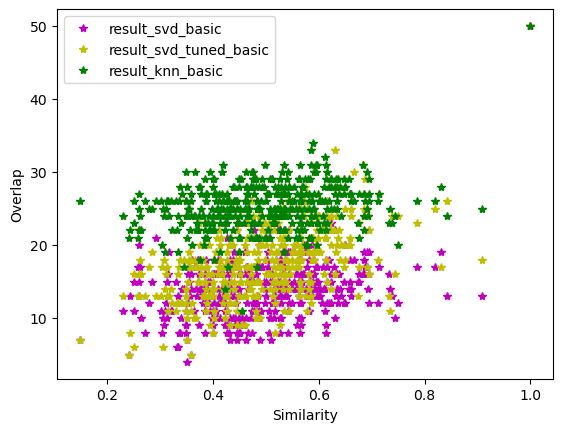

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.grid(True)
plt.xlim=(0.8,1)
#plt.plot(result_svd_means.similarity, result_svd_means .overlap, "b*", linewidth=0.2, label="result_svd_means ")
plt.plot(result_svd_basic.similarity, result_svd_basic.overlap, "m*", linewidth=0.2, label="result_svd_basic")
plt.plot(result_svd_tuned_basic.similarity, result_svd_tuned_basic.overlap, "y*", linewidth=0.2, label="result_svd_tuned_basic")
#plt.plot(result_svd_tuned_means.similarity, result_svd_tuned_means.overlap, "c*", linewidth=0.2, label="result_svd_tuned_with_means")
#plt.plot(result_svd_tuned_pearson.similarity, result_svd_tuned_pearson.overlap, "k.", linewidth=0.2, label="result_svd_tuned_pearson")
#plt.plot(result_knn_with_means.similarity, result_knn_with_means.overlap, "g*", linewidth=0.2, label="result_knn_with_means")
plt.plot(result_knn_basic.similarity, result_knn_basic.overlap, "g*", linewidth=0.2, label="result_knn_basic")
#plt.plot(result_knn_pearson.similarity, result_knn_pearson.overlap, "r*", linewidth=0.2, label="result_knn_pearson")
plt.xlabel('Similarity')
plt.ylabel('Overlap')

plt.legend();

## Upload trained models and their predictions

In [ ]:
knn_basic_preds, knn_basic_algo = dump.load('./model/trained_models/KNNBasic_Model')
knn_basic_model = cf_model(knn_basic_algo, trainset, testset, data, 10, knn_basic_preds)
knn_basic_model.fit_and_predict()

In [ ]:
knn_wmeans_preds, knn_wmeans_algo = dump.load('./model/trained_models/KNNWithMeans_Model')
knn_with_means_model = cf_model(knn_wmeans_algo, trainset, testset, data, 10, knn_wmeans_preds)
knn_with_means_model.fit_and_predict()

In [ ]:
svd_preds, svd_algo = dump.load('./model/trained_models/SVDDefault_Model')
svd_model = cf_model(svd_algo, trainset, testset, data, 10, svd_preds)
svd_model.fit_and_predict()